#### Load Dataset in Local Runtime

In [ ]:
# Copy Dataset to Local Runtime for Faster Processing
!cp "/content/drive/MyDrive/MS DL NLP Final Project/Dataset/Flicker30kDataset.zip" /content/

# Unzip Dataset to Local Runtime
!unzip /content/Flicker30kDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

#### Imports

In [ ]:
# Import Required Packages
import os
import numpy as np
from tqdm import tqdm

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import EfficientNetB4

import PIL
import PIL.Image
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Refer to Show & Tell Code for Logic Reference...
# TODO:
# 1) Create Data Loader in Tensorflow
#  [DONE] -> It should create batches of images 32 / 64
#  -> DataFrame: Name | NPZ, where Name is filename and NPZ will be null initially

# 2) EfficientNet Model
#  [DONE] -> Initialize with ImageNet Weights
#  -> For each batch -> Forward Pass
#  -> Extract Encodings from FC Layers
#  -> Append to DataFrame at corresponding indices

# 3) Save NPZ
#  -> For each image -> save <image_name>.npz file containing image encodings

#### Batch & Preprocess - Pipeline

In [ ]:
# Create Batch

# Input Image Size Guideline for EfficientNet Family of Models
#   EfficientNet B0:
#   Input Size: 224x224 pixels

#   EfficientNet B1:
#   Input Size: 240x240 pixels

#   EfficientNet B2:
#   Input Size: 260x260 pixels


#   EfficientNet B3:
#   Input Size: 300x300 pixels

#   EfficientNet B4:
#   Input Size: 380x380 pixels

#   EfficientNet B5:
#   Input Size: 456x456 pixels

#   EfficientNet B6:
#   Input Size: 528x528 pixels

#   EfficientNet B7:
#   Input Size: 600x600 pixels

# Parameters
batch_size = 32
img_height = 380
img_width = 380
data_dir = '/content/flickr30k_images/flickr30k_images'
features_dir = '/content/MaxPooledFeatures/'

# Create list of file paths to extract file name in future
file_paths = tf.data.Dataset.list_files(data_dir + '/*.jpg')

# Read, Decode, and Resize Image
def read_image(file_path):
  img = tf.io.read_file(file_path)
  img = tf.image.decode_image(img, channels = 3, expand_animations = False)
  img = tf.image.resize(img, (img_height, img_width))
  img = tf.cast(img, tf.float32)
  return img, file_path

# Create Image Dataset - Map read_image fn on file_paths and apply batch
ds = file_paths.map(read_image).batch(batch_size)

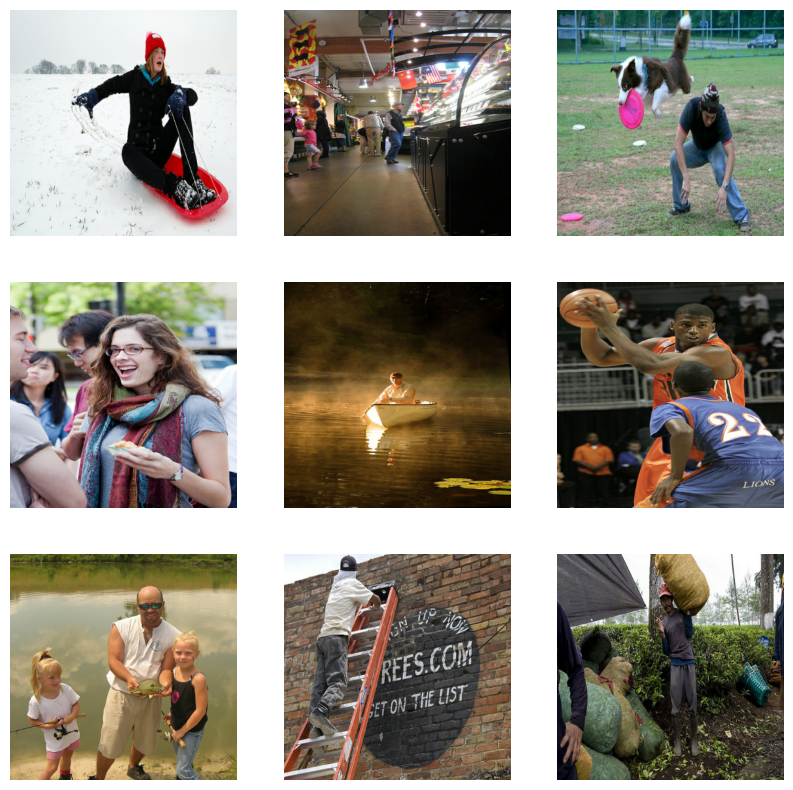

In [ ]:
# Visualize One Batch
plt.figure(figsize = (10, 10))
for images, filepaths in ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
### THIS STEP IS NOT REQUIRED AS EFFICIENTNET MODEL IMPLEMENTATION IN TF CONTAINS ALL PREPROESSING STEPS

# Apply EfficientNet Pre-processing Steps

# Mapping Function
# def preprocess_batch(images, labels):
#   preprocessed_images = preprocess_input(images)
#   return preprocessed_images, labels

# Apply Function to All Batches
# preprocessed_ds = ds.map(preprocess_batch)

#### Load Model

In [ ]:
# Load EfficientNet B4 model with ImageNet weights

# Global Max Pooling v/s Global Avg Pooling
#    Need to use Global Pooling for dimension reduction in final layer of model.
#    By default, EfficientNet uses GlobalAvgPool, which is better for capturing overall salient features.
#    GlobalMaxPool can be used to focus only on more prominent / dominant features.
#    Need to experiment with both, which gives better results.

model = EfficientNetB4(
    weights = 'imagenet',
    include_top = False,
    input_shape = (380, 380, 3),
    pooling = 'max'
)
model.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 380, 380, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 380, 380, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 380, 380, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 380, 380, 3)          0         ['normalization_1

#### Extract and Store Features

In [ ]:
# Extract Features
for images, filepaths in tqdm(ds, desc = "Processing Batch"):
  # Forward Propagate through EfficientNetB4
  features = model(images)

  # Store Features
  for i, filepath in enumerate(filepaths):
    # filename
    filename = str(filepath.numpy().decode('utf-8').split('/')[-1].split('.')[0]) + '.npz'

    # ith file's features
    feature = features[i].numpy()

    # Save file in .npz format
    np.savez(features_dir + filename, feature)

Processing Batch: 100%|██████████| 994/994 [09:21<00:00,  1.77it/s]


In [ ]:
# Move to GDrive
!zip -r MaxPooledFeatures.zip /content/MaxPooledFeatures
!cp -r /content/MaxPooledFeatures.zip "/content/drive/MyDrive/MS DL NLP Final Project/Dataset/"

Streaming output truncated to the last 5000 lines.
  adding: content/MaxPooledFeatures/515684832.npz (deflated 12%)
  adding: content/MaxPooledFeatures/267325341.npz (deflated 10%)
  adding: content/MaxPooledFeatures/7199344342.npz (deflated 11%)
  adding: content/MaxPooledFeatures/6899246013.npz (deflated 10%)
  adding: content/MaxPooledFeatures/5687835693.npz (deflated 12%)
  adding: content/MaxPooledFeatures/1547327107.npz (deflated 11%)
  adding: content/MaxPooledFeatures/1690350208.npz (deflated 11%)
  adding: content/MaxPooledFeatures/2148916767.npz (deflated 11%)
  adding: content/MaxPooledFeatures/241345770.npz (deflated 9%)
  adding: content/MaxPooledFeatures/4929777339.npz (deflated 12%)
  adding: content/MaxPooledFeatures/3117602933.npz (deflated 11%)
  adding: content/MaxPooledFeatures/6960287365.npz (deflated 11%)
  adding: content/MaxPooledFeatures/4805425261.npz (deflated 11%)
  adding: content/MaxPooledFeatures/459560684.npz (deflated 12%)
  adding: content/MaxPooledFea